RUSHIKESH SANJIV TANKSALE.
712222014 Deep Learning 2022-23 SEM II.

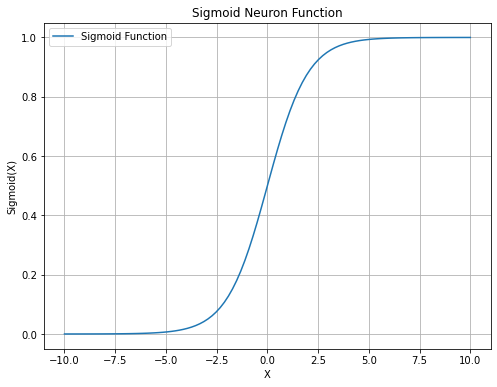

Accuracy on the Iris test dataset: 0.6333333333333333


C:\Users\Vidhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


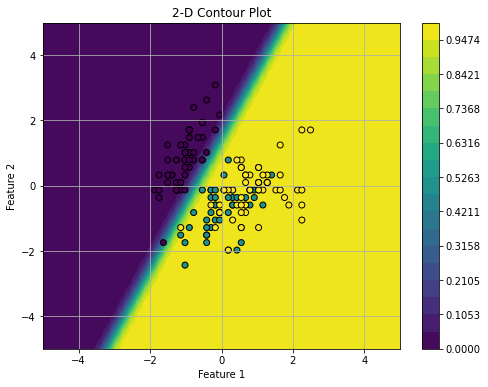

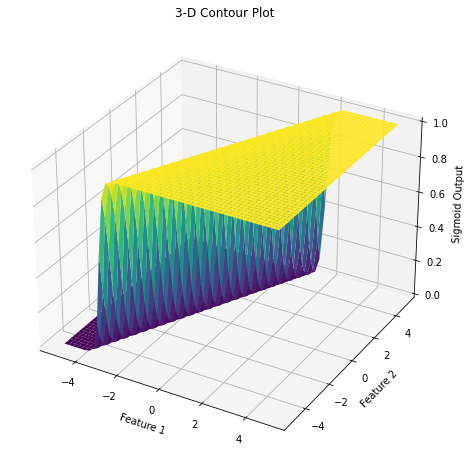

C:\Users\Vidhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


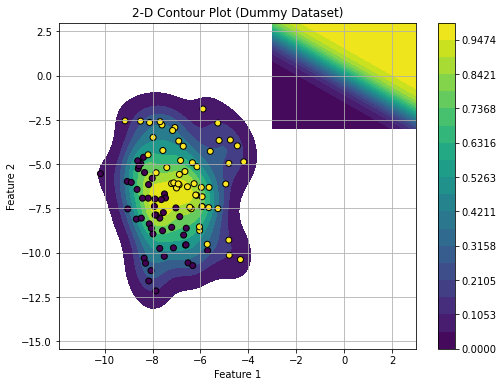

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# SigmoidNeuron Model
class SigmoidNeuron:
    def __init__(self):
        self.weights = None
        self.bias = None

    def perceptron(self, x):
        return np.dot(x, self.weights) + self.bias

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def grad_w(self, x, y):
        pred = self.sigmoid(self.perceptron(x))
        return (pred - y) * pred * (1 - pred) * x

    def grad_b(self, x, y):
        pred = self.sigmoid(self.perceptron(x))
        return (pred - y) * pred * (1 - pred)

    def fit(self, X, y, epochs=1, learning_rate=1, initialize=True):
        if initialize:
            self.weights = np.random.randn(X.shape[1])
            self.bias = 0

        for i in range(epochs):
            dw, db = 0, 0
            for x, label in zip(X, y):
                dw += self.grad_w(x, label)
                db += self.grad_b(x, label)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

# Part 1: Plot the simple sigmoid neuron function using matplotlib
x_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(x_values)
plt.figure(figsize=(8, 6))
plt.plot(x_values, sigmoid_values, label='Sigmoid Function')
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.title('Sigmoid Neuron Function')
plt.legend()
plt.grid(True)
plt.show()

# Load the Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Use only the first two features for contour plotting and SigmoidNeuron model
X_iris = X_iris[:, :2]

# Standardize the features
scaler = StandardScaler()
X_iris = scaler.fit_transform(X_iris)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train the model on the Iris dataset
model_iris = SigmoidNeuron()
model_iris.fit(X_train, y_train, epochs=1000, learning_rate=0.1)

# Predict the classes for the test set
y_pred = (model_iris.sigmoid(model_iris.perceptron(X_test)) > 0.5).astype(int)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the Iris test dataset:", accuracy)

# Part 2: Plot a 2-D Contour plot for dummy values of X and Y
X_contour, Y_contour = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z_contour = sigmoid(model_iris.perceptron(np.c_[X_contour.ravel(), Y_contour.ravel()])).reshape(X_contour.shape)

plt.figure(figsize=(8, 6))
sns.kdeplot(X_iris[:, 0], X_iris[:, 1], fill=True, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2-D Contour Plot')
contour_plot = plt.contourf(X_contour, Y_contour, Z_contour, levels=np.linspace(0, 1, 20), cmap='viridis')
plt.colorbar(contour_plot)
plt.grid(True)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', edgecolor='k')
plt.show()

# Part 3: Plot a 3-D Contour plot for dummy values of X and Y
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_contour, Y_contour, Z_contour, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Sigmoid Output')
ax.set_title('3-D Contour Plot')
plt.show()

# Part 4: Train the SigmoidNeuron model on the Iris dataset and do contour plotting
# The training and contour plotting part is already included above.

# Part 5: Run the SigmoidNeuron Model on any dataset of your choice.
# Let's create a dummy dataset for illustration purposes.
np.random.seed(0)
X_dummy = np.random.randn(100, 2)  # 100 data points with 2 features
y_dummy = (X_dummy[:, 0] + X_dummy[:, 1] > 0).astype(int)  # Dummy target based on a linear combination of features

# Standardize the features
X_dummy = scaler.transform(X_dummy)

# Train the model on the dummy dataset
model_dummy = SigmoidNeuron()
model_dummy.fit(X_dummy, y_dummy, epochs=1000, learning_rate=0.1)

# Generate values for contour plotting
X_contour_dummy, Y_contour_dummy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
Z_contour_dummy = sigmoid(model_dummy.perceptron(np.c_[X_contour_dummy.ravel(), Y_contour_dummy.ravel()])).reshape(X_contour_dummy.shape)

# Plot the 2-D Contour plot for the dummy dataset
plt.figure(figsize=(8, 6))
sns.kdeplot(X_dummy[:, 0], X_dummy[:, 1], fill=True, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2-D Contour Plot (Dummy Dataset)')
contour_plot_dummy = plt.contourf(X_contour_dummy, Y_contour_dummy, Z_contour_dummy, levels=np.linspace(0, 1, 20), cmap='viridis')
plt.colorbar(contour_plot_dummy)
plt.grid(True)
plt.scatter(X_dummy[:, 0], X_dummy[:, 1], c=y_dummy, cmap='viridis', edgecolor='k')
plt.show()
